<a href="https://colab.research.google.com/github/srikarpavan/cloud-computing-autism-data-analysis/blob/master/autismprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
print(os.listdir("/content/drive/My Drive/Colab Notebooks"))

['Untitled1.ipynb', 'spam.csv', 'Sentiment.csv', 'gridsearch.ipynb', 'Untitled0.ipynb', 'Untitled2.ipynb', 'image.ipynb', 'autoencoder.ipynb', 'imagecnn.ipynb', 'Untitled4.ipynb', 'Untitled3.ipynb', 'Untitled5.ipynb', 'Untitled6.ipynb', 'Untitled7.ipynb', 'Untitled8.ipynb', 'Untitled9.ipynb', 'Untitled10.ipynb', 'Untitled11.ipynb', 'sequence.ipynb', 'Untitled12.ipynb', 'Autism_Data.arff', 'Toddler Autism dataset.csv']


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Autism_Data.arff',na_values='?')
df2 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Toddler Autism dataset.csv',na_values='?')
df1.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,f,NaN,no,no,Egypt,no,2,'18 and more',NaN,NO


In [18]:
df2.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
A1_Score           704 non-null int64
A2_Score           704 non-null int64
A3_Score           704 non-null int64
A4_Score           704 non-null int64
A5_Score           704 non-null int64
A6_Score           704 non-null int64
A7_Score           704 non-null int64
A8_Score           704 non-null int64
A9_Score           704 non-null int64
A10_Score          704 non-null int64
age                702 non-null float64
gender             704 non-null object
ethnicity          609 non-null object
jundice            704 non-null object
austim             704 non-null object
contry_of_res      704 non-null object
used_app_before    704 non-null object
result             704 non-null int64
age_desc           704 non-null object
relation           609 non-null object
Class/ASD          704 non-null object
dtypes: float64(1), int64(11), object(9)
memory usage: 115.6+ KB


In [22]:
df2.info

<bound method DataFrame.info of       Case_No  A1  ...  Who completed the test  Class/ASD Traits 
0           1   0  ...           family member                 No
1           2   1  ...           family member                Yes
2           3   1  ...           family member                Yes
3           4   1  ...           family member                Yes
4           5   1  ...           family member                Yes
...       ...  ..  ...                     ...                ...
1049     1050   0  ...           family member                 No
1050     1051   0  ...           family member                Yes
1051     1052   1  ...           family member                Yes
1052     1053   1  ...           family member                 No
1053     1054   1  ...           family member                Yes

[1054 rows x 19 columns]>

In [23]:
sns.set_style('whitegrid')
data1= df1[df1['Class/ASD']=='YES']
data2= df2[df2['Class/ASD Traits ']=='Yes']
print("Adults: ",len(data1)/len(df1) * 100)
print("Toddlers:",len(data2)/len(df2) * 100)

Adults:  26.84659090909091
Toddlers: 69.07020872865274


Text(0.5, 1, 'Toddlers dataset')

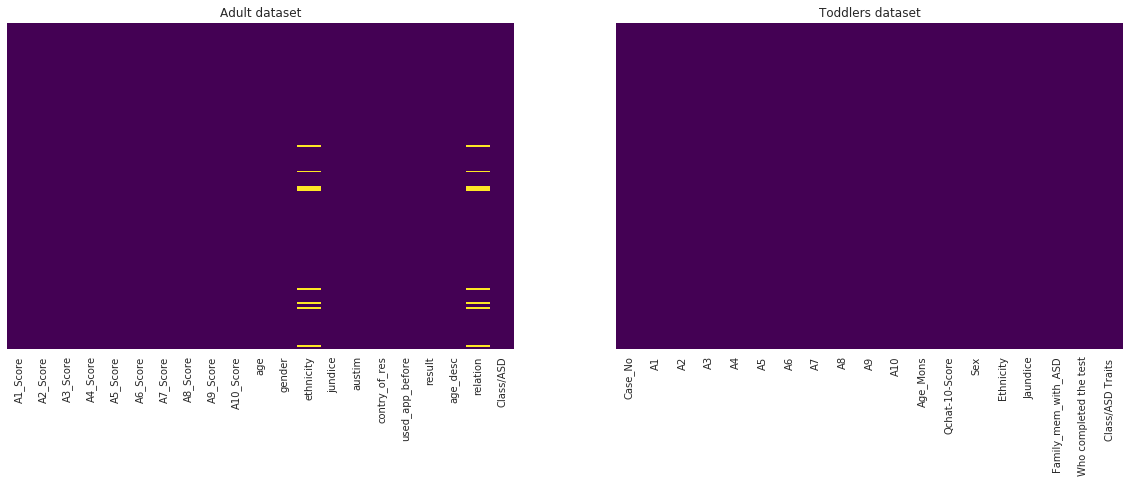

In [24]:
#Let's visualize the missing data
fig, ax = plt.subplots(1,2,figsize=(20,6))
sns.heatmap(data1.isnull(),yticklabels=False,cbar=False,cmap='viridis',ax=ax[0])
ax[0].set_title('Adult dataset')
sns.heatmap(data2.isnull(),yticklabels=False,cbar=False,cmap='viridis',ax=ax[1])
ax[1].set_title('Toddlers dataset')


Text(0.5, 0, 'Jaundice while birth')

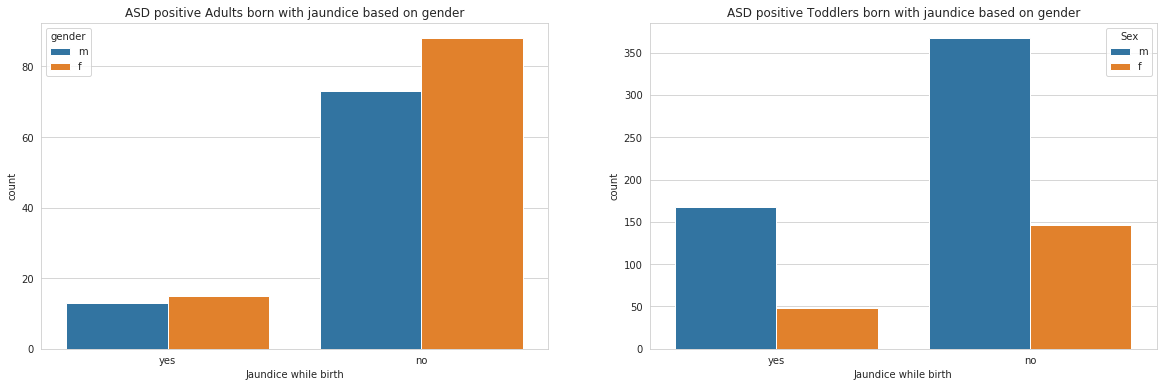

In [25]:
#Let's visualize the jaundice born child based on gender
fig, ax = plt.subplots(1,2,figsize=(20,6))
sns.countplot(x='jundice',data=data1,hue='gender',ax=ax[0])
ax[0].set_title('ASD positive Adults born with jaundice based on gender')
ax[0].set_xlabel('Jaundice while birth')
sns.countplot(x='Jaundice',data=data2,hue='Sex',ax=ax[1])
ax[1].set_title('ASD positive Toddlers born with jaundice based on gender')
ax[1].set_xlabel('Jaundice while birth')

Text(0.5, 1.0, 'Age distribution of ASD positive')

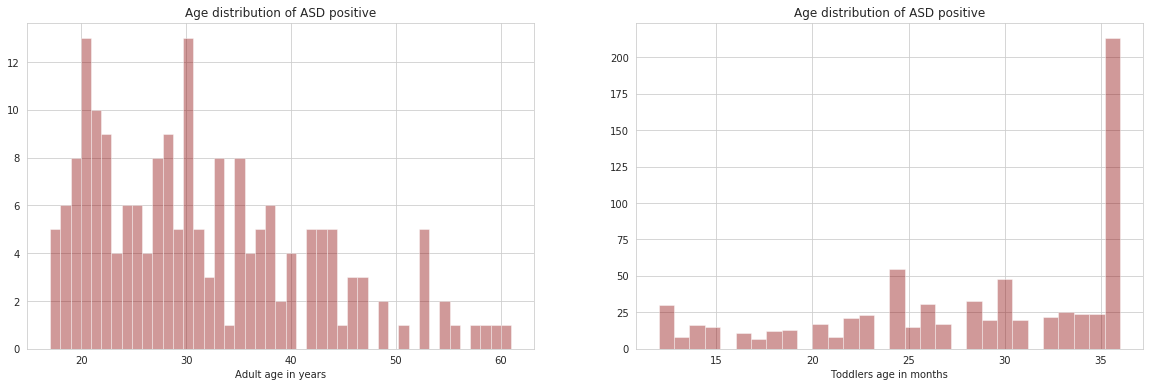

In [26]:
#Let's see the age distribution of ASD positive
fig, ax = plt.subplots(1,2,figsize=(20,6))
sns.distplot(data1['age'],kde=False,bins=45,color='darkred',ax=ax[0])
ax[0].set_xlabel('Adult age in years')
ax[0].set_title('Age distribution of ASD positive')
sns.distplot(data2['Age_Mons'],kde=False,bins=30,color='darkred',ax=ax[1])
ax[1].set_xlabel('Toddlers age in months')
ax[1].set_title('Age distribution of ASD positive')

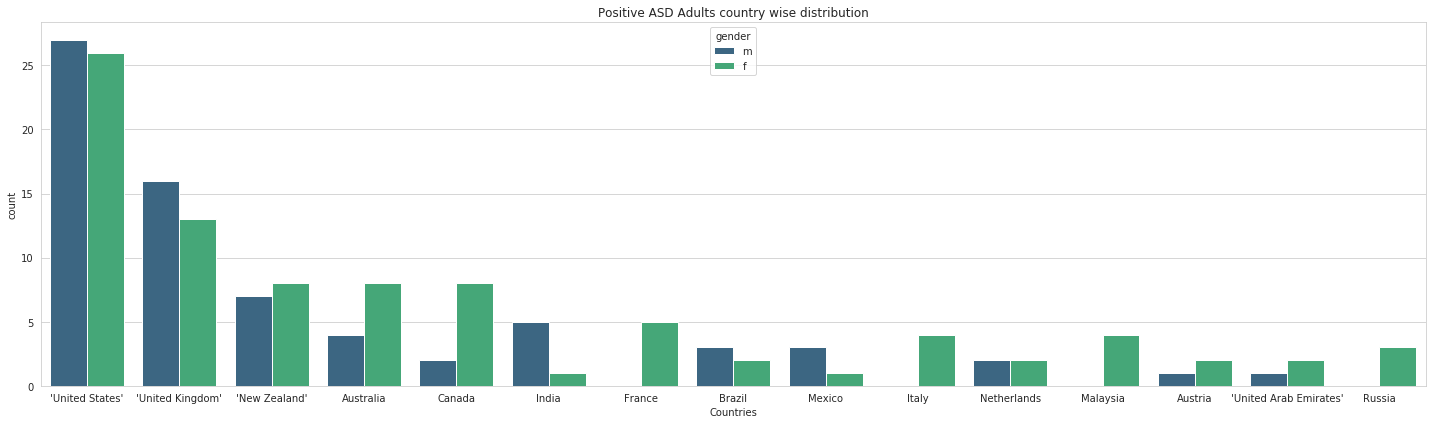

In [27]:
# Let's visualize positive ASD positive Adults based on top 15 countries
plt.figure(figsize=(20,6))
sns.countplot(x='contry_of_res',data=data1,order= data1['contry_of_res'].value_counts().index[:15],hue='gender',palette='viridis')
plt.title('Positive ASD Adults country wise distribution')
plt.xlabel('Countries')
plt.tight_layout()

In [63]:
#Lets see the ethnicity value counts
print(data1['ethnicity'].value_counts())
print(data2['Ethnicity'].value_counts())

White-European       109
Black                 18
Asian                 16
Latino                10
Others                 9
'Middle Eastern '      8
Hispanic               5
'South Asian'          3
Turkish                1
Pasifika               1
Name: ethnicity, dtype: int64
White European    250
asian             212
middle eastern     96
black              39
south asian        37
Hispanic           30
Others             29
Latino             20
Pacifica            7
mixed               5
Native Indian       3
Name: Ethnicity, dtype: int64


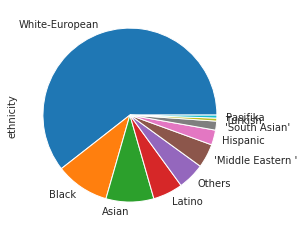

In [74]:
data1['ethnicity'].value_counts().plot(kind='pie')

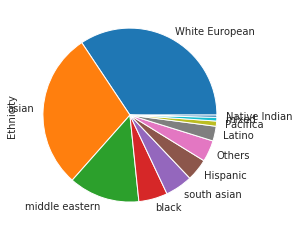

In [84]:
data2['Ethnicity'].value_counts().plot(kind= 'pie')

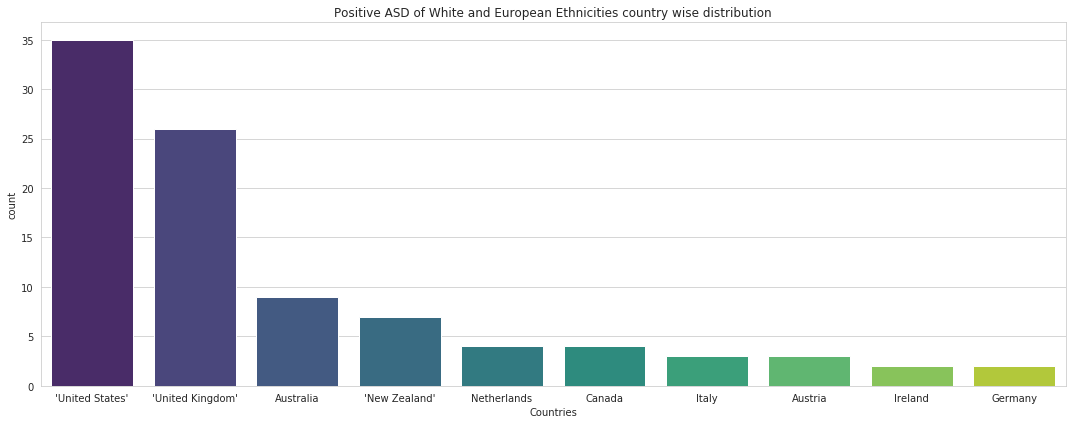

In [29]:
#Lets visualize the ASD distribution of Adult White and European ethnicity based on country
#We are considering both country and ethnicity because the reports suggests so.
plt.figure(figsize=(15,6))
sns.countplot(x='contry_of_res',data=data1[data1['ethnicity']=='White-European'],order=data1[data1['ethnicity']=='White-European']['contry_of_res'].value_counts().index[:10],palette='viridis')
plt.title('Positive ASD of White and European Ethnicities country wise distribution')
plt.xlabel('Countries')
plt.tight_layout()

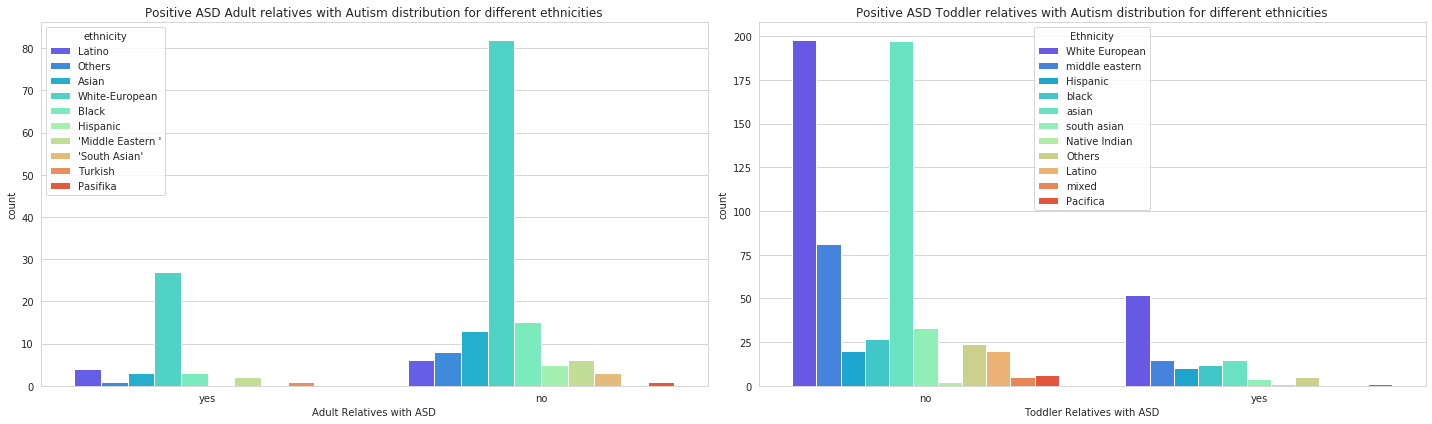

In [30]:
#Lets visualize the distribution of autism in family within different ethnicity
fig, ax = plt.subplots(1,2,figsize=(20,6))
sns.countplot(x='austim',data=data1,hue='ethnicity',palette='rainbow',ax=ax[0])
ax[0].set_title('Positive ASD Adult relatives with Autism distribution for different ethnicities')
ax[0].set_xlabel('Adult Relatives with ASD')
sns.countplot(x='Family_mem_with_ASD',data=data2,hue='Ethnicity',palette='rainbow',ax=ax[1])
ax[1].set_title('Positive ASD Toddler relatives with Autism distribution for different ethnicities')
ax[1].set_xlabel('Toddler Relatives with ASD')
plt.tight_layout()

In [0]:
within24_36= pd.get_dummies(df2['Age_Mons']>24,drop_first=True)
within0_12 = pd.get_dummies(df2['Age_Mons']<13,drop_first=True)
male=pd.get_dummies(df2['Sex'],drop_first=True)
ethnics=pd.get_dummies(df2['Ethnicity'],drop_first=True)
jaundice=pd.get_dummies(df2['Jaundice'],drop_first=True)
ASD_genes=pd.get_dummies(df2['Family_mem_with_ASD'],drop_first=True)
ASD_traits=pd.get_dummies(df2['Class/ASD Traits '],drop_first=True)

In [33]:
final_data= pd.concat([within0_12,within24_36,male,ethnics,jaundice,ASD_genes,ASD_traits],axis=1)
final_data.columns=['within0_12','within24_36','male','Latino','Native Indian','Others','Pacifica','White European','asian','black','middle eastern','mixed','south asian','jaundice','ASD_genes','ASD_traits']
final_data.head()

,within0_12,within24_36,male,Latino,Native Indian,Others,Pacifica,White European,asian,black,middle eastern,mixed,south asian,jaundice,ASD_genes,ASD_traits
0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1
2,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,1
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1


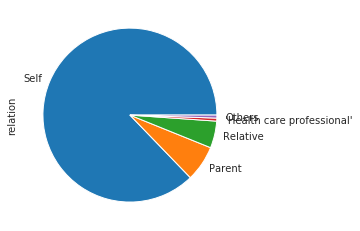

In [93]:
data1.relation.value_counts().plot(kind = 'pie')

AttributeError: ignored

In [0]:
from sklearn.model_selection import train_test_split
X= final_data.iloc[:,:-1]
y= final_data.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [36]:
from sklearn.linear_model import LogisticRegression
logmodel= LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.01,0.1,1,10,100,1000]}

In [0]:
grid_log = GridSearchCV(LogisticRegression(),param_grid,refit=True)

In [44]:
grid_log.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [45]:
grid_log.best_estimator_

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
pred_log=grid_log.predict(X_test)

In [49]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred_log))
print(classification_report(y_test,pred_log))

[[  0  78]
 [  0 133]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        78
           1       0.63      1.00      0.77       133

    accuracy                           0.63       211
   macro avg       0.32      0.50      0.39       211
weighted avg       0.40      0.63      0.49       211



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=500)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [51]:
pred_rfc= rfc.predict(X_test)
print(confusion_matrix(y_test,pred_rfc))
print(classification_report(y_test,pred_rfc))

[[ 22  56]
 [  5 128]]
              precision    recall  f1-score   support

           0       0.81      0.28      0.42        78
           1       0.70      0.96      0.81       133

    accuracy                           0.71       211
   macro avg       0.76      0.62      0.61       211
weighted avg       0.74      0.71      0.66       211



In [0]:
#first scale the variables
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)

In [54]:
X_scaled = pd.DataFrame(scaled_features,columns=X.columns)
X_scaled.head()

,within0_12,within24_36,male,Latino,Native Indian,Others,Pacifica,White European,asian,black,middle eastern,mixed,south asian,jaundice,ASD_genes
0,-0.260543,0.714163,-1.517918,-0.159034,-0.053427,-0.185331,-0.087454,-0.681094,-0.629306,-0.230102,2.146249,-0.087454,-0.245687,1.630865,-0.438529
1,-0.260543,0.714163,0.658797,-0.159034,-0.053427,-0.185331,-0.087454,1.468226,-0.629306,-0.230102,-0.465929,-0.087454,-0.245687,1.630865,-0.438529
2,-0.260543,0.714163,0.658797,-0.159034,-0.053427,-0.185331,-0.087454,-0.681094,-0.629306,-0.230102,2.146249,-0.087454,-0.245687,1.630865,-0.438529
3,-0.260543,-1.400241,0.658797,-0.159034,-0.053427,-0.185331,-0.087454,-0.681094,-0.629306,-0.230102,-0.465929,-0.087454,-0.245687,-0.613171,-0.438529
4,-0.260543,-1.400241,-1.517918,-0.159034,-0.053427,-0.185331,-0.087454,1.468226,-0.629306,-0.230102,-0.465929,-0.087454,-0.245687,-0.613171,2.280351


In [0]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=101)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
error_rate =[]

for i in range (1,50):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i= knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

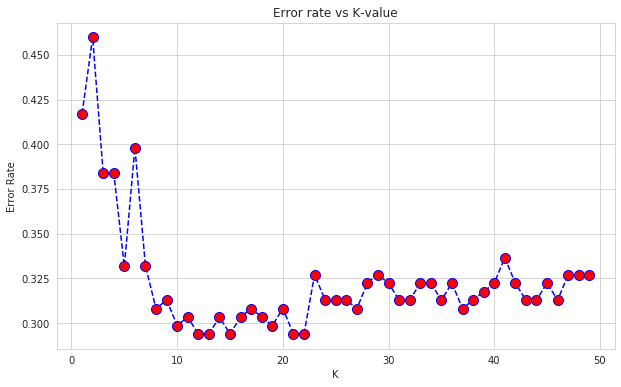

In [57]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error rate vs K-value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [58]:
knn= KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [59]:
pred_knn=knn.predict(X_test)
print(confusion_matrix(y_test,pred_knn))
print(classification_report(y_test,pred_knn))

[[ 27  51]
 [ 11 122]]
              precision    recall  f1-score   support

           0       0.71      0.35      0.47        78
           1       0.71      0.92      0.80       133

    accuracy                           0.71       211
   macro avg       0.71      0.63      0.63       211
weighted avg       0.71      0.71      0.67       211

